  # Titanic dataset analysis
  
  ## Contents
    ** 1. Preprocessing**
         ** 1.1 Initialization and Data loading **
         ** 1.2 Outliers Detection and Removal**
    ** 2. Feature Analysis**
         ** 2.1 Analysis of Survived Feature with Other Features**
         ** 2.2 Passenger Class Feature**
             ** 2.2.1 Relation with Fare Feature**
             ** 2.2.2 Relation with Survived Feature**
         ** 2.3 Sex Feature**
             ** 2.3.1 Relation with Survived Feature**
             ** 2.3.2 Relation based on Classes**
     ** Conclusion**
         
  ## 1.1 Initialization and Data loading

In [1]:
#all header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


sns.set(style='white', context='notebook', palette='deep')


In [2]:
#read training set and testing set

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.2 Outliers Detection and Removal

Here I will implement the Turkey method which is developed by Yessini Ghouzam 
https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling/notebook


In [3]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train_set,2,["Age","SibSp","Parch","Fare"])
train_set.loc[Outliers_to_drop]

/home/ansumsingh/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S


In [4]:
#drop the outliers
train_set = train_set.drop(Outliers_to_drop,axis=0).reset_index(drop=True)


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [6]:
#find null values and replace NaNs with np.nan
train_set = train_set.fillna(np.nan)
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [7]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## 2. Feature Analysis
### 2.1 Analysis of Survived Feature with Other Features

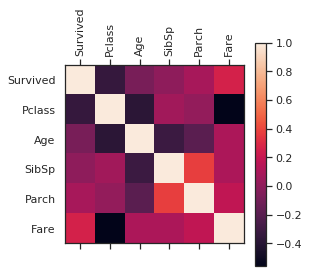

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334097,-0.076867,0.003330,0.092819,0.264613
Pclass,-0.334097,1.000000,-0.374495,0.065031,0.016440,-0.555558
Age,-0.076867,-0.374495,1.000000,-0.307129,-0.186457,0.110219
SibSp,0.003330,0.065031,-0.307129,1.000000,0.379281,0.110072
Parch,0.092819,0.016440,-0.186457,0.379281,1.000000,0.183801
Fare,0.264613,-0.555558,0.110219,0.110072,0.183801,1.000000


In [9]:
colsToPlots = ["Survived","Pclass","Age","SibSp","Parch","Fare"]
plt.matshow(train_set[colsToPlots].corr())
plt.xticks(range(len(train_set[colsToPlots].columns)), train_set[colsToPlots], rotation ='vertical')
plt.yticks(range(len(train_set[colsToPlots].columns)), train_set[colsToPlots].columns)
plt.colorbar()
plt.show()

train_set[colsToPlots].corr()

Here, it is interesting to note that **Survived** has a strong positive correlation with Fare and negative correlations with **Age** and **Pclass**, which means that with the increasing age, the chances of survival was low. Similarly, people with higher class values had low possibility of survival. To dig more on the relation of the Survival with Pclass, let us first try to find relation of PClass and Fare.  

### 2.2 Passenger Class Feature
#### 2.2.1 Relation with Fare Feature

In [10]:
train_set[["Fare","Pclass"]].corr()

,Fare,Pclass
Fare,1.000000,-0.555558
Pclass,-0.555558,1.000000


The correlation shows that the Fare feature also has negative correlation with Pclass. To dig more into the detail, let 
us plot fare vs Pclass

/home/ansumsingh/Desktop/DataScience&Keras/dataScience/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ansumsingh/Desktop/DataScience&Keras/dataScience/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ansumsingh/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] 

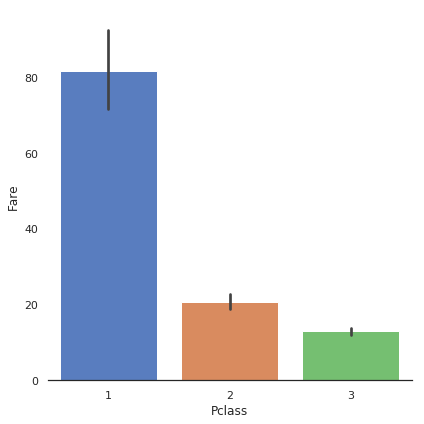

In [11]:
g = sns.factorplot(x="Pclass",y="Fare",data=train_set,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")

Bar graph shows that there are 3 types of passenger class, namely _Class 1_, _Class_2_, and _Class 3_. According to the dataset, those classes are based on socio-economic status (SES), which means Class 1, 2, and 3 are, respectively for upper, middle, and lower class. 

The bar graph clearly indicates that fare is higher for Class 1, compared to Class 2 and 3, which is consistent with the correlation with Fare.

Now it is interesting to see how survival rate is distributed accross theses class.

#### 2.2.2 Relation with Suvived Feature

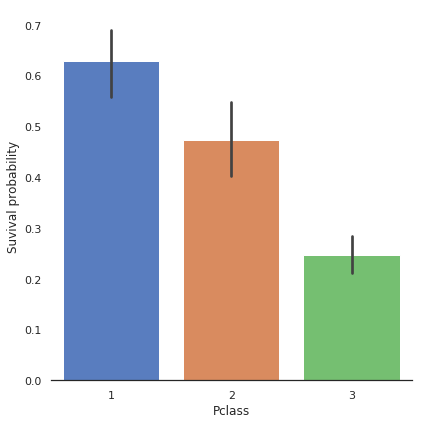

In [12]:
g = sns.factorplot(x="Pclass",y="Survived",data=train_set,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Suvival probability")

The bar graph clearly shows that Class 1 had higher prosibility of survival, and it it consistent with the Fare distributution. However, it is interesting to see that higher proportion of middle class also survived in the accident.

### 2.3 Sex Feature


In [17]:
train_set["Sex"].isnull().sum()


0

### 2.3.1 Relation with Survived Feature

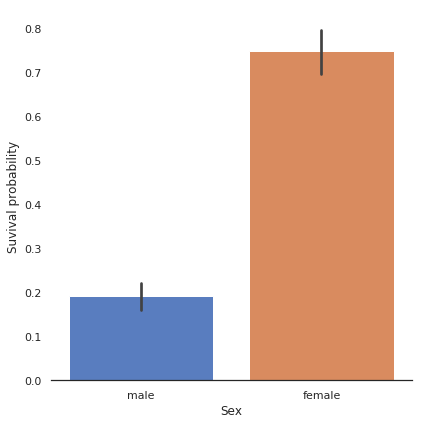

In [18]:
g = sns.factorplot(x="Sex",y="Survived",data=train_set,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Suvival probability")

The relations shows that higher number of female survived compared to male. Now let us examine how survived male and female are distributed with respect to Class feature.

### 2.3.2 Relation based on Classes

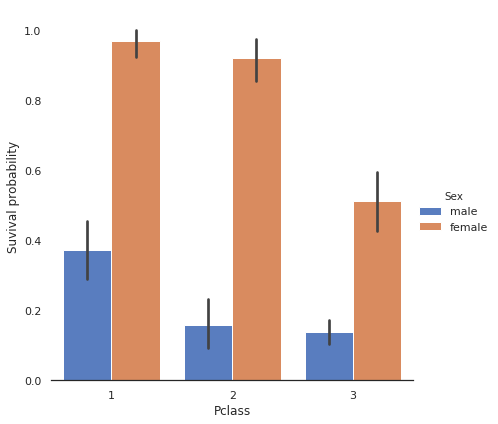

In [19]:
g = sns.factorplot(x="Pclass",y="Survived",hue="Sex",data=train_set,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Suvival probability")

The result is consistent with respect to the previous result. However, it is intersting to see that more than 90% of females from the upper and middle class survived compared to lower class. The figure for lower class passenger is around 50%.
On the other hand, around 40% of the male from the upper class survived from the accident, whereas, the figure is less than 20% for middle and lower class passengers. 